1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [17]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

mean = 6.3
dist = stats.poisson(mean)

p = 1 - dist.cdf(15) 

norm = stats.norm()
ref =  norm.cdf(-3) + 1 - norm.cdf(3)

print('Is 15 hurracanes a significantly large number? ', p < ref)

Is 15 hurracanes a significantly large number?  True


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

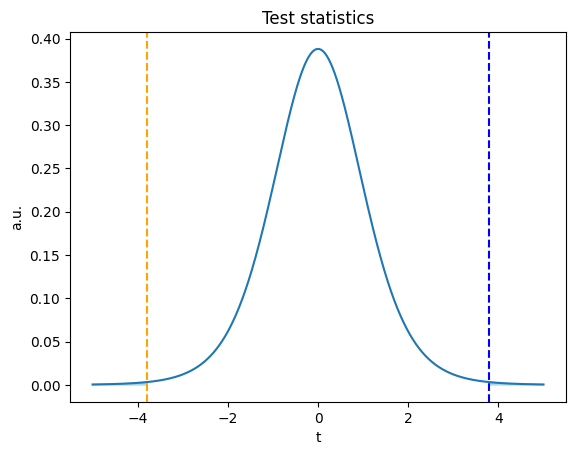

p-value = 0.004302464132864604
Considering alpha = 5%, is the blood pressure statistically changed after the halogen lamp exposition?  True


In [18]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)

mean_pre = np.mean(pre)
mean_post = np.mean(post)

sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)
T = (mean_pre-mean_post)/(sigma*np.sqrt(2/n))


xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)

plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()


pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print('Considering alpha = 5%, is the blood pressure statistically changed after the halogen lamp exposition? ', pvalue<0.05)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

parameters:
 [  6.73581534   2.29443036 132.80903382  15.77935296]
covariance matrix:
 [[ 6.31515081e-03 -2.12241672e-04 -2.15121999e-02  1.91656249e-03]
 [-2.12241672e-04  2.75445787e-02  2.17804035e+00 -1.70938869e-01]
 [-2.15121999e-02  2.17804035e+00  2.03807436e+02 -1.61257254e+01]
 [ 1.91656249e-03 -1.70938869e-01 -1.61257254e+01  1.38436579e+00]]
Mean = 6.74 +- 0.08
var = 2.29 +- 0.17
Scale = 132.81 +- 14.28
Offset = 15.78 +- 1.18
parameters:
 [  7.16452595   1.9759002  260.76390538 -61.32093712]
covariance matrix:
 [[ 2.22849996e-03 -4.92553781e-05 -1.08266688e-02  1.09101757e-03]
 [-4.92553781e-05  5.77327371e-03  8.74433833e-01 -7.06520088e-02]
 [-1.08266688e-02  8.74433833e-01  1.78560559e+02 -1.45310471e+01]
 [ 1.09101757e-03 -7.06520088e-02 -1.45310471e+01  1.41330809e+00]]
Mean = 7.16 +- 0.05
var = 1.98 +- 0.08
Scale = 260.76 +- 13.36
Offset = -61.32 +- 1.19


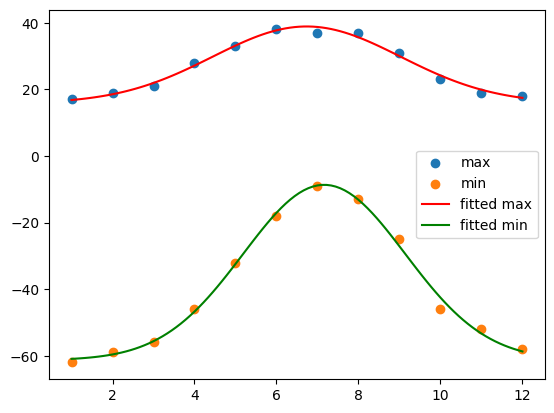

The fit over the period of one year seems to be accurate for both the min and the max temperatures using two gaussian pdf.
The time offsett, so the mean of the two gaussians, is reallty close to 7, so in July for both the temperatures CHIEDI


In [19]:
from scipy import optimize

max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

month = np.arange(12) + 1

x = np.linspace(1,12,100)


def gau(x, m, v, A , off):
    return A*stats.norm.pdf(x, loc = m, scale = v) + off



popt_max, pcov_max = optimize.curve_fit(gau, month, max, p0=[6, 1, 1, 0], full_output=False)
print("parameters:\n", popt_max)
print("covariance matrix:\n", pcov_max)
print("Mean = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("var = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("Scale = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("Offset = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))


popt_min, pcov_min = optimize.curve_fit(gau, month, min, p0=[6, 1, 1, 0], full_output=False)
print("parameters:\n", popt_min)
print("covariance matrix:\n", pcov_min)
print("Mean = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("var = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("Scale = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("Offset = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))





plt.scatter(month, max, label='max')
plt.scatter(month, min, label='min')
plt.plot(x, gau(x, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='red', label='fitted max')

plt.plot(x, gau(x, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='green', label='fitted min')
plt.legend(loc='best')
plt.show()

print('The fit over the period of one year seems to be accurate for both the min and the max temperatures using two gaussian pdf.')
print('The time offsett, so the mean of the two gaussians, is reallty close to 7, so in July for both the temperatures CHIEDI')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

[ 4.39593944e+03 -9.46662360e-02  6.45186170e-02]
Scale  4395.9394364744485 Mean  -0.09466623599646573 Variance  0.06451861698599896


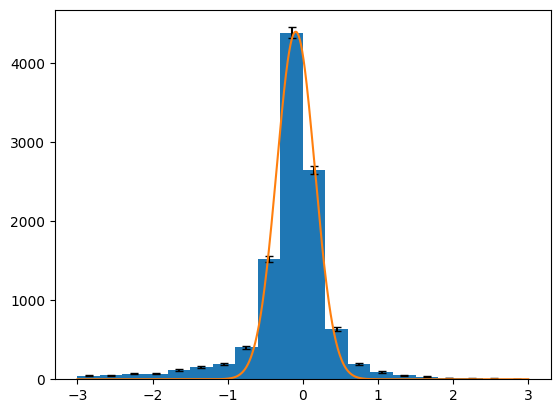

n degrees of freedom = 19
chi2 = 16548.531261651668
p-value = 0.0


In [20]:
import pandas as pd
import pickle


infile = open('data/residuals_261.pkl', 'rb')
data = pickle.load(infile).item()
infile.close()

data = data['residuals']

n_bins = 20

n, bins, _ = plt.hist(data, bins=n_bins, range=(-3, +3))
bin_center = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
n_err = np.sqrt(n)
plt.errorbar(bin_center, n, n_err, fmt='none', c='black', capsize=3)

def f(x, S ,m ,v):
    # return S*stats.norm.pdf(x, loc = m, scale = v)
    return S*np.exp(-((x - m) ** 2) / (2 * v))

popt, pcov = optimize.curve_fit(f, bin_center, n, p0=[1, 0,  1], full_output=False)   #p0=[4.39593944e+03, -9.46662360e-02,  6.45186170e-02]

x = np.linspace(-3,3,1000)
print('Scale ',popt[0] ,'Mean ', popt[1], 'Variance ', popt[2])
plt.plot(x, f(x, popt[0], popt[1], popt[2]))
plt.show()


ndof = len(n) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
chi2 = np.sum(((n - (f(bin_center, popt[0], popt[1], popt[2])))**2) / n_err)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

,years,temp
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333


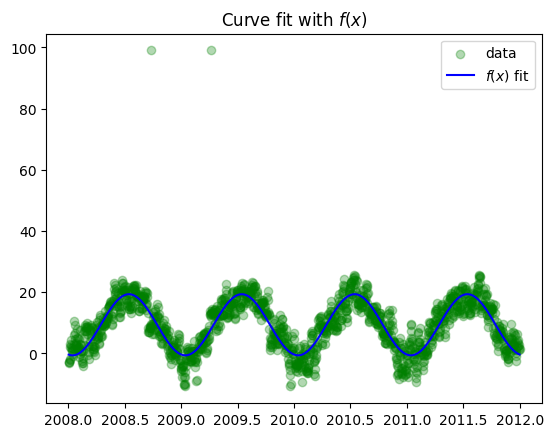

The best fitting parameters are: 
a = -9.988133689134516  b = 12.333023014196588  c = 9.38411486809072 

The overall average temperature is  9.384097734976043
The predicted hottest and coldest temperatures predicted by the model are 19.372248557225234 and -0.6040188210437964 

The b parameter represents a phase shift of the cosine wave, it is needed to correctly allign the curve in the x direction


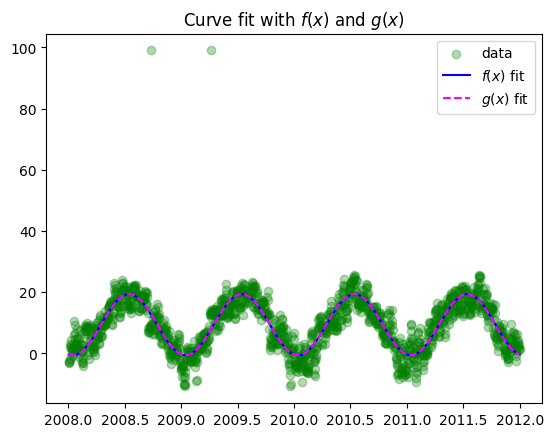

p-value: 0.584 , additional parameter necessary: NO
This is also showed by the plot above, f(x) and g(x) are basically the same.


In [21]:
df = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=' ', names = ['years', 'temp'] )
df = df[(df['years']>2008) & (df['years']<2012)]
display(df)

def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

time = df['years']
temp = df['temp']

popt, pcov = optimize.curve_fit(f, time, temp, p0=[1, 1, 1])

plt.title('Curve fit with $f(x)$')
plt.scatter(time, temp, label = 'data', color = 'green', alpha=0.3)
plt.plot(time, f(time, popt[0], popt[1], popt[2]), label = '$f(x)$ fit', color = 'blue')
plt.legend(loc='best')
plt.show()

print('The best fitting parameters are: ')
print('a =', popt[0], ' b =', popt[1], ' c =', popt[2], '\n')

print('The overall average temperature is ', np.mean(temp))
print('The predicted hottest and coldest temperatures predicted by the model are', -popt[0]+popt[2], 'and', popt[0]+popt[2], '\n')
print('The b parameter represents a phase shift of the cosine wave, it is needed to correctly allign the curve in the x direction')



def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d


popt2, pcov2 = optimize.curve_fit(g, time, temp, p0=[1, 1, 1, 1])

plt.title('Curve fit with $f(x)$ and $g(x)$')
plt.scatter(time, temp, label = 'data', color = 'green', alpha=0.3)
plt.plot(time, f(time, popt[0], popt[1], popt[2]), label = '$f(x)$ fit', color = 'blue')
plt.plot(time, g(time, popt2[0], popt2[1], popt2[2], popt2[3]), label = '$g(x)$ fit', color = 'magenta', ls='--')
plt.legend(loc='best')
plt.show()



def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < 0.05 else "NO")
    return pval

ssr_1 = np.sum((temp-f(time, popt[0], popt[1], popt[2]))**2)
ndof_1 = 3-1

ssr_2 = np.sum((temp-g(time, popt2[0], popt2[1], popt2[2], popt2[3]))**2)
ndof_2 = 4-1

pvalue = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, len(temp), verbose=True)
print('This is also showed by the plot above, f(x) and g(x) are basically the same.')
